In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ES2:
    def __init__(self,eval_function,dim,learning_rate,replacement_type,num_iterations,k,pop_size):
        self.eval_function=eval_function
        self.dim=dim
        self.learning_rate=learning_rate
        self.rng = np.random.default_rng()
        self.replacement_type=replacement_type
        self.tau=learning_rate/np.sqrt(2*dim)
        self.tau1=learning_rate/np.sqrt(2*np.sqrt(dim))
        self.num_iterations=num_iterations
        self.k=k
        self.pop_size=pop_size
    
    def mutate(self,parents,params):
        #tu zakładamy że pi=lambda
        #losowanie z normalnym - jeden ten sam, jeden losowany po współrzędnych powinien być (rzędy niezal) - trzeba spr w dokumentacji
        child_parameters=params*np.exp(self.rng.normal(0,self.tau,params.shape)+self.rng.normal(0,self.tau1))
        children=parents+self.rng.normal(0,child_parameters,parents.shape)
        #print('parameters:')
        #print(params,child_parameters)
        return children,child_parameters
    
    def fit(self):
        #init function (jak będzie optymalnie?)
        parents=self.rng.normal(0,self.tau,(self.pop_size,self.dim))
        params=np.ones((self.pop_size,self.dim))
        self.results=np.zeros(self.num_iterations)

        scores=self.eval_function(parents)
        ordering=np.argsort(scores)
        chosen_parents=parents[ordering]
        chosen_params=params[ordering]
        best_individual=parents[0]
        best_score=scores[0]
        for i in range(self.num_iterations):
            #nie sprawdzam w ostatniej iteracji
            #print(scores)
            #sus sprawa
            top_score=np.min(scores)
            self.results[i]=top_score
            top_pop=chosen_parents[np.where(scores==top_score)]
            if top_score<best_score:
                best_individual=top_pop
                best_score=top_score
            # print('###########################################################')
            # print(i,top_score,top_pop,self.eval_function(top_pop))
            # print(chosen_parents[0],self.eval_function(chosen_parents[0].reshape(1,-1)))
            # print('###########################################################')
            #print(best_individual,best_score)
            #top k parents
            children,child_params=self.mutate(chosen_parents[:self.k],chosen_params[:self.k])
            #print(scores,chosen_parents)
            #print('#############')
            #można mniej w if dać ale nie ma co
            if self.replacement_type==',':
                scores=self.eval_function(children)
                #print('children:')
                #print(children)
                ordering=np.argsort(scores)
                chosen_parents=children[ordering]
                chosen_params=child_params[ordering]
                #print('inside:')
                #print(scores)
                #print(chosen_parents.shape)
            else:
                population=np.vstack([children,chosen_parents[:self.k]])
                params=np.vstack([child_params,chosen_params[:self.k]])
                scores=self.eval_function(population)
                ordering=np.argsort(scores)
                chosen_parents=population[ordering]
                chosen_params=params[ordering]
                #print(chosen_parents.shape)
            
        return best_individual,best_score
        
    def draw_results(self):
        plt.figure(figsize=(12,4))
        plt.plot(self.results)
        plt.show()


In [17]:
def griewank(X):

    fr = 4000
    s = np.sum(X**2, axis=1)
    indices = np.arange(1, X.shape[1] + 1)
    p = np.prod(np.cos(X / np.sqrt(indices)), axis=1)
    return s / fr - p + 1

def branin(X):

    if X.shape[1] != 2:
        raise ValueError("Each row of input array must have exactly 2 elements for the Branin function.")
    
    a = 5.1 / (4 * np.pi**2)
    b = 5 / np.pi
    c = 1 / (8 * np.pi)
    
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    term1 = (x2 - a * x1**2 + b * x1 - 6)**2
    term2 = 10 * (1 - c) * np.cos(x1)
    
    return term1 + term2 + 10

def bh1(X):

    if X.shape[1] != 2:
        raise ValueError("Each row of input array must have exactly 2 elements for the Bohachevsky function 1.")
    
    term1 = X[:, 0]**2
    term2 = 2 * X[:, 1]**2
    term3 = -0.3 * np.cos(3 * np.pi * X[:, 0])
    term4 = -0.4 * np.cos(4 * np.pi * X[:, 1])
    return term1 + term2 + term3 + term4 + 0.7

def rastrigin(X):

    n = X.shape[1]
    term1 = np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=1)
    return 10 * n + term1

def schwefel(X):

    n = X.shape[1]
    term1 = np.sum(-X * np.sin(np.sqrt(np.abs(X))), axis=1)
    return 418.9829 * n + term1

[[ 0.1817318  -0.93398411]] 0.01804561192158971


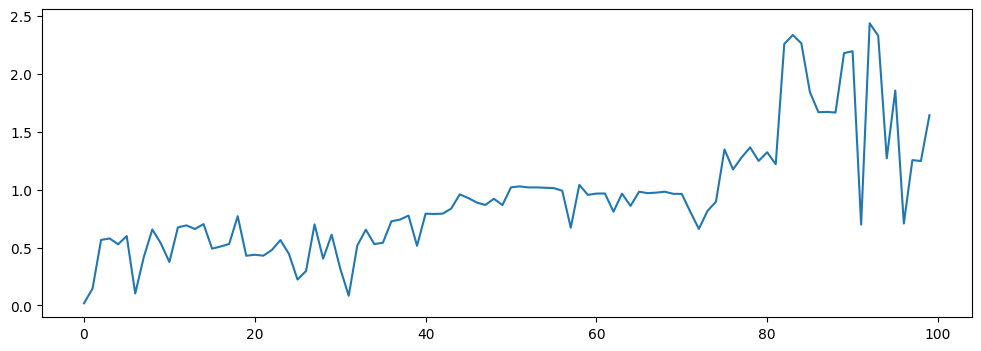

In [5]:
test=ES2(bh1,2,1,',',100,100,100)
result,val=test.fit()
print(result,val)
test.draw_results()

[[7.05376062e-10 2.04107330e-09]] 0.0


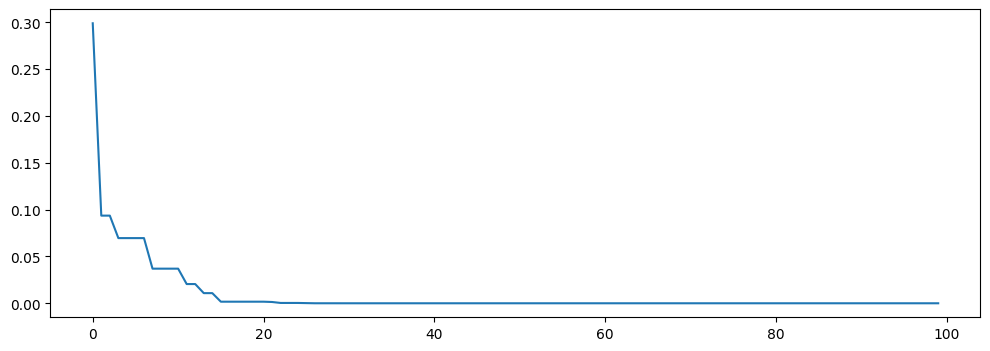

In [4]:
test=ES2(bh1,2,1,'+',100,100,100)
result,val=test.fit()
print(result,val)
test.draw_results()

[[ 0.00784099  0.17139353 -0.04420089  0.09494202 -0.03870502 -0.14754276
   0.15807089 -0.17108641 -0.32952569  0.11462428  0.13886648  0.26229801
   0.04599176  0.05958523 -0.04721692  0.027178    0.24928981  0.14314838
   0.21011435  0.17905165]] 0.016011572675384333


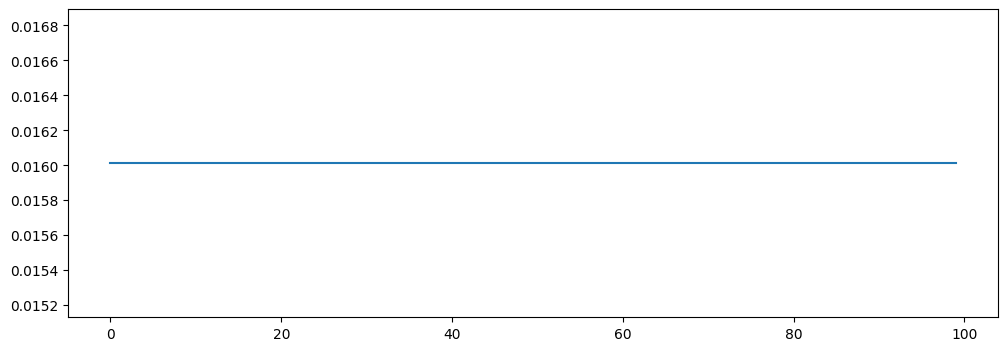

In [3]:
test=ES2(griewank,20,1,'+',100,100,100)
result,val=test.fit()
print(result,val)
test.draw_results()

[[3.17327303 1.03896087]] 0.4067114402207572


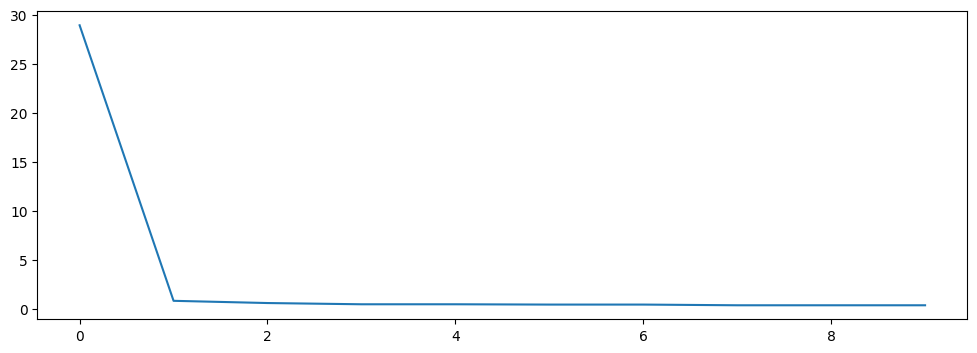

In [9]:
test=ES2(branin,2,1,'+',10,100,100)
result,val=test.fit()
print(result,val)
test.draw_results()

[[ 0.02055198 -0.27054774  0.09209381 -0.13195452 -0.17882621  0.1045126
  -0.21280889 -0.06832283 -0.2982769  -0.06434646  0.17310109  0.02199634
   0.14432793 -0.135056    0.09385802  0.19007558  0.17064729 -0.14426349
   0.14318106  0.04025324]] 0.012636526768197709


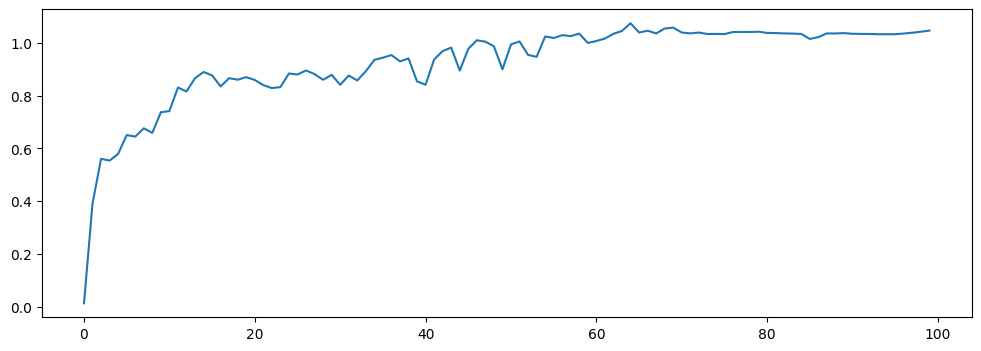

In [6]:
test=ES2(griewank,20,1,',',100,100,100)
result,val=test.fit()
print(result,val)
test.draw_results()

[[-1.14423294e-03  3.63051561e-04  1.00335328e-03  1.45329453e-03
  -4.33974045e-05  1.49605127e-03  5.93880368e-04 -2.78300367e-03
   1.39112479e-03 -5.15908109e-04  2.05237152e-03 -3.24531710e-03
   1.03336904e-03  9.24469439e-04 -2.53260091e-05 -8.59260671e-04
  -3.70775234e-04 -3.26537297e-03 -9.37335891e-04 -7.91416065e-04]] 8.391492073434037e-07


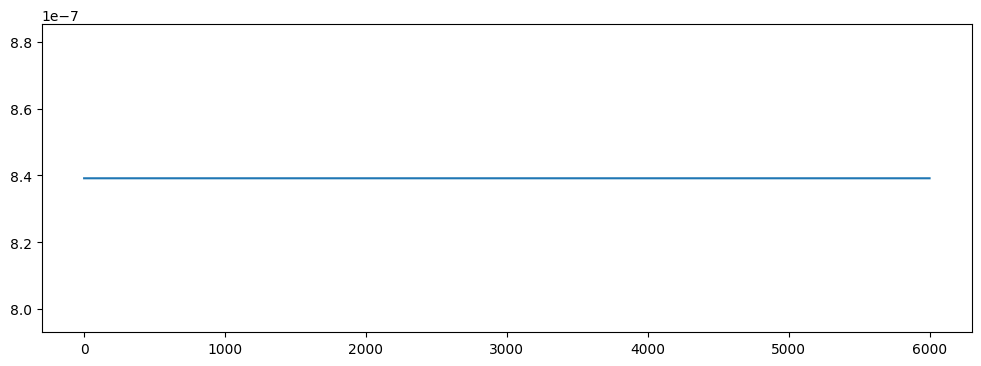

In [16]:
test=ES2(griewank,20,0.01,'+',6000,1000,1000)
result,val=test.fit()
print(result,val)
test.draw_results()

[[3.14159277 2.27500009]
 [3.14159284 2.27500023]] 0.39788735772973816


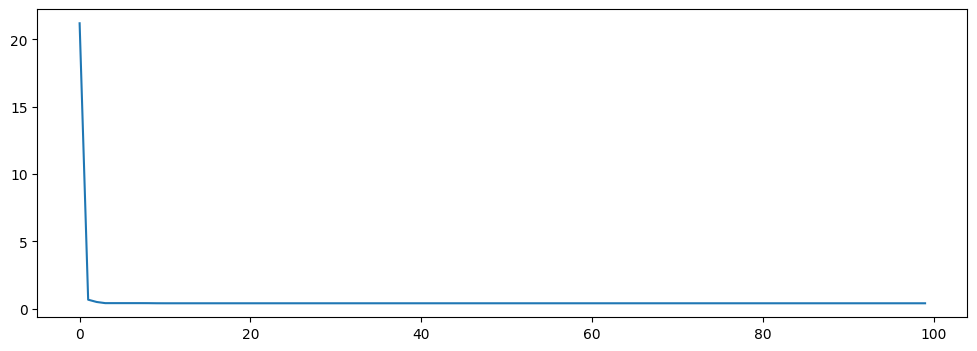

In [10]:
test=ES2(branin,2,1,'+',100,1000,1000)
result,val=test.fit()
print(result,val)
test.draw_results()

[[-1.12865385e-09 -3.58653440e-11 -1.69841060e-09  9.94958640e-01
  -8.98753372e-10 -1.99360339e-10  9.94958637e-01 -1.14401348e-08
   7.73271051e-10 -6.56926645e-10  9.94958641e-01  6.78877956e-09
  -2.75285557e-09  2.05620373e-09 -1.18069931e-09  1.03397677e-09
  -8.07162348e-09  1.32609596e-08 -3.95668794e-10 -8.59308990e-10]] 2.9848771712798907


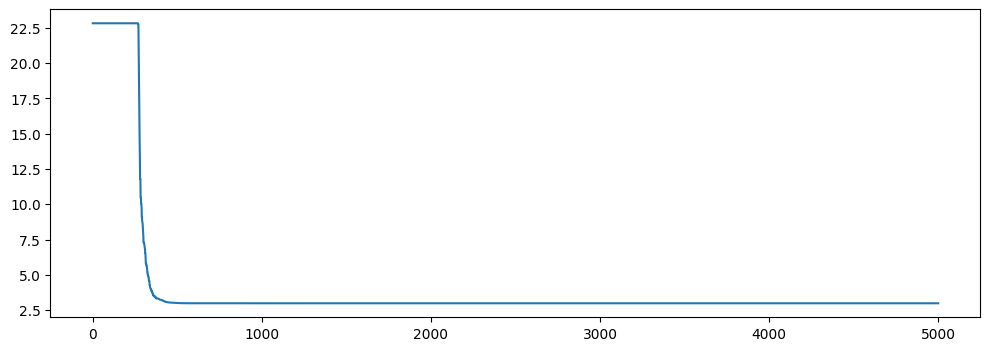

In [14]:
test=ES2(rastrigin,20,1,'+',5000,1000,1000)
result,val=test.fit()
print(result,val)
test.draw_results()

[[ 25384.23400149  14647.30411443  -2024.01339918 -19412.60183605
    -572.13717437 -10137.77259992 -14638.22665965  -3191.48285299
     949.26392776   4552.80252197   -404.85151168    610.06497554
     561.14174071    589.95018659   6740.06170156   4156.08627004
    3790.23162457   1038.89668719  -5737.90144487 190116.63218897]] -1369234.6415738976


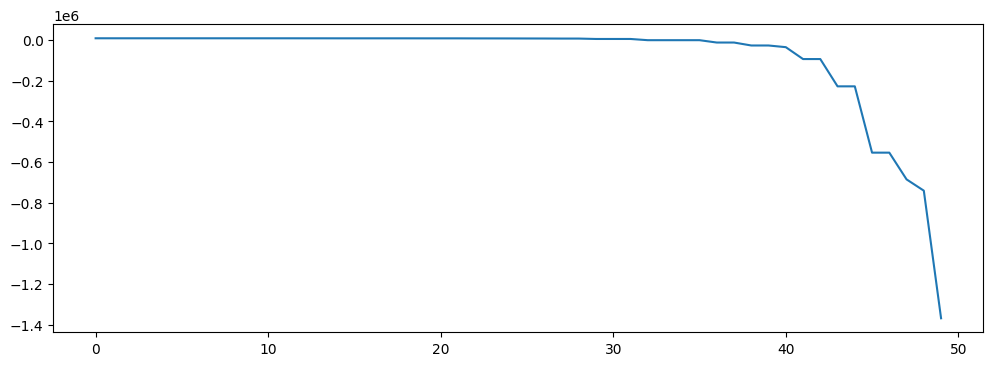

In [ ]:
#ucieka poza obszar przeszukiwań (do dorobienia)
test=ES2(schwefel,20,1.7,'+',50,1000,1000)
result,val=test.fit()
print(result,val)
test.draw_results()

[[  421.00381971 -1802.69220485  -302.88795504  -135.12503193
    716.69453344    65.94675093   -25.93444769  6934.96154176
   -559.09227078 -5455.09335306  -558.90025016    65.28900986
   6935.04789013 -1309.20919649   203.67924068 -1309.06355122
    203.80591892  3381.61911421  -302.80420132  3381.93578152]] -25627.31201558792


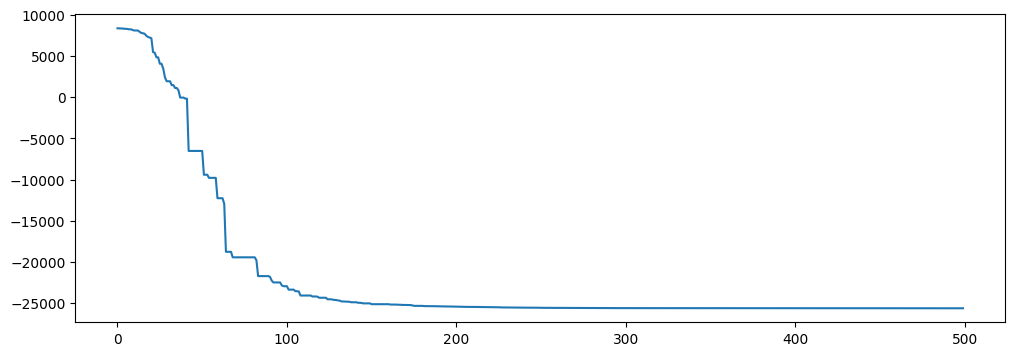

In [27]:
test=ES2(schwefel,20,1,'+',500,1000,1000)
result,val=test.fit()
print(result,val)
test.draw_results()